In [1]:
# !ls -hl|grep csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from time import time, ctime
from sklearn.metrics import accuracy_score, classification_report, classification, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from helper import plot_confusion_matrix, plot_confusion_matrix2
dim=lambda *x: [i.shape for i in x]

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%time
df = pd.read_csv('./preprocessed.csv')
print df.shape

(49260, 748)
CPU times: user 2.96 s, sys: 252 ms, total: 3.21 s
Wall time: 3.21 s


In [3]:
X = df.iloc[:,2:].values
print X.shape
y = df.iloc[:,1].map({'male':1,'female':0}).values
print y.shape
df.head(1)

(49260, 746)
(49260,)


,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,...,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,b,bi,7,0.428571,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0


In [4]:
%%time
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for i in range(5):
    i=str(i)
    exec("labelencoder_X_{} = LabelEncoder()".format(i))
    exec("X[:, {}] = labelencoder_X_{}.fit_transform(X[:, {}])".format(i,i,i))

CPU times: user 142 ms, sys: 1e+03 µs, total: 143 ms
Wall time: 142 ms


In [5]:
%%time
print X.shape
onehotencoder = OneHotEncoder(categorical_features = range(6))
X = onehotencoder.fit_transform(X).toarray()
print X.shape

(49260, 746)
(49260, 4505)
CPU times: user 1.34 s, sys: 477 ms, total: 1.81 s
Wall time: 1.81 s


In [6]:
%%time
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit on training set
X = sc.fit_transform(X)
print X.shape

(49260, 4505)
CPU times: user 2.88 s, sys: 1.54 s, total: 4.42 s
Wall time: 4.42 s


https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,\
ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier

from mlxtend.classifier import StackingClassifier

import numpy as np

In [8]:
ctime()

'Sat Nov 11 17:26:08 2017'

In [ ]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=320, min_samples_split=4, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr)

print('5-fold cross validation:\n')

if __name__ == '__main__':
    stack1=[]
    for clf, label in zip([clf1, clf2, clf3, clf4, clf5,  sclf], 
                          ['AdaBoost', 
                           'Random Forest', 
                           'Xgboost',
                           'Bagging',
                           'ExtraTrees',
                           'Stacking']):

        scores = model_selection.cross_val_score(clf, X, y, 
#                                                  n_jobs=-1,
                                                  cv=5, scoring='accuracy')
        stack1.append([label, scores, scores.mean(), scores.std()])
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.8237 (+/- 0.0008) [AdaBoost]
Accuracy: 0.8244 (+/- 0.0013) [Random Forest]
Accuracy: 0.8298 (+/- 0.0019) [Xgboost]
Accuracy: 0.8269 (+/- 0.0019) [Bagging]
Accuracy: 0.8268 (+/- 0.0012) [ExtraTrees]


In [ ]:
S1_time = ctime()
S1_time

In [ ]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=320, min_samples_split=4, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr, 
                         use_probas=True,
                          average_probas=False)

print('5-fold cross validation:\n')

if __name__ == '__main__':
    
    stack2 = []
    for clf, label in zip([clf1, clf2, clf3, clf4, clf5,  sclf], 
                          ['AdaBoost', 
                           'Random Forest', 
                           'Xgboost',
                           'Bagging',
                           'ExtraTrees',
                           'Stacking']):

        scores = model_selection.cross_val_score(clf, X, y, 
#                                                  n_jobs=-1,
                                                  cv=5, scoring='accuracy')
        stack2.append([label, scores, scores.mean(), scores.std()])
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

In [ ]:
S2_time = ctime()
S2_time

In [15]:
stack1

[['AdaBoost',
  array([ 0.82330255,  0.82511165,  0.8226756 ,  0.82369062,  0.8234697 ]),
  0.82365002369368789,
  0.00080507980493064015],
 ['Random Forest',
  array([ 0.82299807,  0.82592367,  0.82511165,  0.82521315,  0.82275911]),
  0.82440113197399723,
  0.0012764916941748496],
 ['Xgboost',
  array([ 0.82989952,  0.8317093 ,  0.8316078 ,  0.82917174,  0.82661659]),
  0.82980098897816001,
  0.001868275523513574],
 ['Bagging',
  array([ 0.82604283,  0.82998376,  0.82805522,  0.82531466,  0.8250939 ]),
  0.8268980724943058,
  0.0018630156210343507],
 ['ExtraTrees',
  array([ 0.82685477,  0.82835972,  0.82754771,  0.82643118,  0.82489087]),
  0.82681685010371453,
  0.0011639735131901646],
 ['Stacking',
  array([ 0.82746372,  0.82785221,  0.82846123,  0.82582217,  0.82570297]),
  0.82706045958704189,
  0.001107047276820309]]

In [16]:
stack2

[['AdaBoost',
  array([ 0.82330255,  0.82511165,  0.8226756 ,  0.82369062,  0.8234697 ]),
  0.82365002369368789,
  0.00080507980493064015],
 ['Random Forest',
  array([ 0.82299807,  0.82592367,  0.82511165,  0.82521315,  0.82275911]),
  0.82440113197399723,
  0.0012764916941748496],
 ['Xgboost',
  array([ 0.82989952,  0.8317093 ,  0.8316078 ,  0.82917174,  0.82661659]),
  0.82980098897816001,
  0.001868275523513574],
 ['Bagging',
  array([ 0.82523089,  0.82825822,  0.82886724,  0.82470564,  0.82377424]),
  0.8261672461092564,
  0.0020199828324036695],
 ['ExtraTrees',
  array([ 0.82726073,  0.82754771,  0.82825822,  0.8271417 ,  0.82560146]),
  0.82716196388000418,
  0.00087131062491349154],
 ['Stacking',
  array([ 0.83203085,  0.83353634,  0.83038977,  0.8271417 ,  0.8275302 ]),
  0.83012577140370336,
  0.002488882720539454]]

## feature selection

In [8]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline

In [9]:
X_train, y_train, = X, y

In [11]:
%%time
m1 = AdaBoostClassifier().fit(X_train, y_train)
index1= pd.Series(m1.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/3*2].index

m2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1).fit(X_train, y_train)
index2= pd.Series(m2.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/3*2].index

m3 = XGBClassifier(nthread=-1, max_depth=24, min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6).fit(X_train, y_train)
index3= pd.Series(m3.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/3*2].index

# m4 = BaggingClassifier(n_jobs=-1, n_estimators=50).fit(X_train, y_train)
# index4= pd.Series(m4.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/3*2].index

m5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100).fit(X_train, y_train)
index5= pd.Series(m5.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/3*2].index

CPU times: user 57min 4s, sys: 4.32 s, total: 57min 9s
Wall time: 4min 42s


(49260, 3002)

In [11]:
ix = pd.read_csv('./feature_importance_2D3.csv')
ix.head()

,ada,forest,xgb,extraTree,ada_sort,forest_sort,xgb_sort,extraTree_sort
0,0,0,3765,0,0,0,0,0
1,3947,3765,4503,3765,1,1,1,1
2,3772,4504,4502,1,2,2,2,2
3,3553,4502,3800,4504,3,4,3,4
4,3944,4503,3804,4503,4,5,4,5


In [13]:
index3 = ix['xgb']
lndex3 = index3.tolist()

In [15]:
 X[:,index3].shape

(49260, 3002)

In [16]:
%%time
xgb = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)

print model_selection.cross_val_score(xgb, X[:,index3], y, n_jobs=-1, cv=5, scoring='accuracy')

[ 0.8289861   0.82866423  0.83089728  0.82785221  0.82681961]
CPU times: user 10.7 s, sys: 2.21 s, total: 13 s
Wall time: 16min 9s


In [10]:
xgb = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)

model_selection.cross_val_score(xgb, X, y, n_jobs=-1, cv=5, scoring='accuracy')

array([ 0.82989952,  0.8317093 ,  0.8316078 ,  0.82917174,  0.82661659])

In [ ]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)
lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

pipe1 = make_pipeline(ColumnSelector(cols=index1), clf1)
pipe2 = make_pipeline(ColumnSelector(cols=index2), clf2)
pipe3 = make_pipeline(ColumnSelector(cols=index3), clf3)
pipe5 = make_pipeline(ColumnSelector(cols=index5), clf5)

sclf = StackingClassifier(classifiers=[pipe3, pipe1, pipe2, clf4, pipe5], 
                          meta_classifier=lr,
                          use_probas=True,
                          average_probas=False)

print('5-fold cross validation:\n')

if __name__ == '__main__':
    
    stack3 = []
    for clf, label in zip([pipe3, pipe1, pipe2,  clf4, pipe5,  sclf], 
                          ['Xgboost',
                           'AdaBoost', 
                           'Random Forest', 
                           'Bagging',
                           'ExtraTrees',
                           'Stacking']):

        scores = model_selection.cross_val_score(clf, X, y, 
                                                 n_jobs=-1,
                                                  cv=5, scoring='accuracy')
        stack3.append([label, scores, scores.mean(), scores.std()])
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

In [ ]:
%%time
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)
lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

pipe1 = make_pipeline(ColumnSelector(cols=index1),
                      clf1)
pipe2 = make_pipeline(ColumnSelector(cols=index2),
                      clf2)
pipe3 = make_pipeline(ColumnSelector(cols=index3),
                      clf3)
pipe5 = make_pipeline(ColumnSelector(cols=index5),
                      clf5)

sclf = StackingClassifier(classifiers=[pipe1, pipe2, pipe3, clf4, pipe5], 
                          meta_classifier=lr,
                          use_probas=True,
                          average_probas=False)

sclf.fit(X, y)

### trainning real model

In [25]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.3, stratify =y, 
                                                  random_state=7)
print dim(X_train, y_train, X_test, y_test )

[(34482, 4505), (34482,), (14778, 4505), (14778,)]


In [33]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr, 
                         use_probas=True,
                          average_probas=False)

In [34]:
%%time
sclf.fit(X=X_train, y=y_train)

CPU times: user 41min 56s, sys: 7.98 s, total: 42min 4s
Wall time: 7min 28s


StackingClassifier(average_probas=False,
          classifiers=[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            mi...imators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [35]:
%%time
pred = sclf.predict(X_test)
print pred

[0 1 1 ..., 1 1 1]
CPU times: user 26.2 s, sys: 1.66 s, total: 27.9 s
Wall time: 27.6 s


In [36]:
accuracy_score(y_test, pred)

0.83556638246041415

Confusion matrix, without normalization
[[  497  2164]
 [  266 11851]]


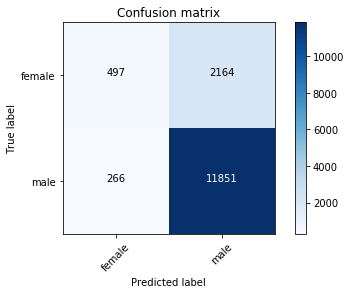

In [37]:
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=['female','male'])

In [27]:
%%time
pred2 = sclf.predict_proba(X_test)
print pred2

[[  1.42345074e-01   8.57654926e-01]
 [  1.22767355e-04   9.99877233e-01]
 [  3.18890248e-03   9.96811098e-01]
 ..., 
 [  1.27312696e-02   9.87268730e-01]
 [  9.01034671e-03   9.90989653e-01]
 [  6.51844049e-05   9.99934816e-01]]
CPU times: user 32.8 s, sys: 1.6 s, total: 34.4 s
Wall time: 27.7 s


In [42]:
(pred2>0.6)[:,1]

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [31]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
accuracy_score(y_test, (pred2>0.3)[:,1])

0.83719041818920015

Confusion matrix, without normalization
[[  466  2195]
 [  211 11906]]


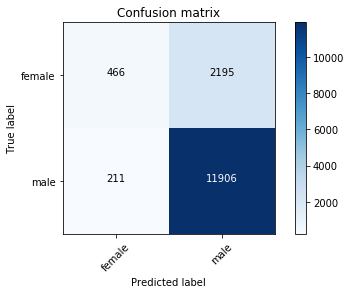

In [107]:
plot_confusion_matrix(confusion_matrix(y_test, (pred2>0.3)[:,1]), classes=['female','male'])